In [25]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn import tree
from sklearn import preprocessing
import pandas as pd
import imblearn
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier

In [2]:
df = pd.read_csv('C:/Users/surendra_dattatrey/Desktop/S&P Data/COVID 19 Text prediction/questions and themes data.csv'
                 ,encoding='ISO-8859-1')
df.head()

,Question,Theme
0,Is the travel ban extended to June 30th?,Travel Guidence
1,Is EAP assistance available for non employees?,Leave and Wellness Benefits
2,How do the senior management team want audit t...,Business Continuity Plan
3,Can you provide clarity on thehub COVID FAQ si...,IT Allowance
4,The Denver office is closing and mergering wit...,Return to the Office


In [3]:
from io import StringIO
#col = ['Product', 'Consumer complaint narrative']
col = ['Question','Theme']
df = df[col]
df = df[pd.notnull(df['Question'])]
df.columns = ['Question','Theme']
df['category_id'] = df['Theme'].factorize()[0]
category_id_df = df[['Theme', 'category_id']].drop_duplicates().sort_values('category_id')
category_to_id = dict(category_id_df.values)
id_to_category = dict(category_id_df[['category_id', 'Theme']].values)
df.head()

,Question,Theme,category_id
0,Is the travel ban extended to June 30th?,Travel Guidence,0
1,Is EAP assistance available for non employees?,Leave and Wellness Benefits,1
2,How do the senior management team want audit t...,Business Continuity Plan,2
3,Can you provide clarity on thehub COVID FAQ si...,IT Allowance,3
4,The Denver office is closing and mergering wit...,Return to the Office,4


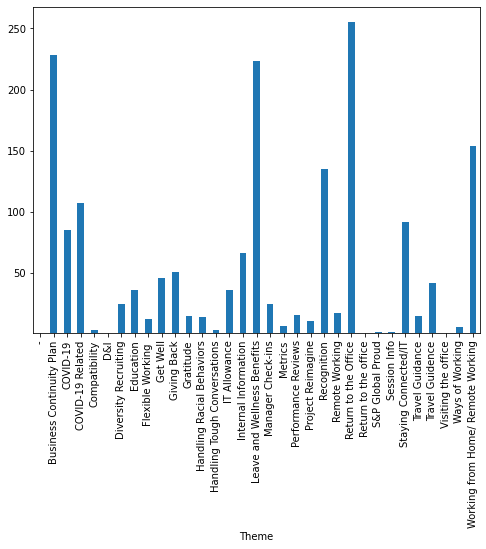

In [4]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(8,6))
df.groupby('Theme').Question.count().plot.bar(ylim=1)
plt.show()

In [14]:
train_data = df.sample(frac=0.7)
train = train_data [['Question']]

In [15]:
df_t = df [['Question','category_id']]

In [55]:
X = df_t['Question'].values
y = df_t['category_id'].values

In [56]:
print(X)

['Is the travel ban extended to June 30th?'
 'Is EAP assistance available for non employees?'
 'How do the senior management team want audit to review this time where controls have changed/tweaked? Do you want us to test and forward think that a COVID situation could happen again? i.e. second wave? Is there anything you want us to look at.. change?'
 ...
 'that comment on NYC is referring to the need to spending on full days of AC.'
 'thank you' 'thanks, Dimitra!']


In [58]:
target_attribute = df_t['category_id']

X_train, X_test, y_train, y_test =  train_test_split(X, y, test_size=0.2)

In [59]:
print(X_train)

['The term African American excludes those black people like me who are not American, Black is fine with me.'
 'Thank you for all your initiatives. Whatever you decide about going back to the offices for work, please follow guidelines from medical experts and the CDC.'
 'Are there any outreach activities being considered to our clients....as a good will'
 ...
 'Will agile working be part of the business culture after the return to normality?'
 'Is the company considering layoffs?'
 'At home I have a standing desk and do not have one in the office. I have got used to using it now and have noticed it improves my productivity . Will it be possible to request a standing desk for my office desk?']


In [60]:
print(X_test)

['what are workplace requirements/best practices related to COVID going to look like once we are allowed to work back in the office again (which will obviously be impacted by Federa/State and Local requirements once determined)?'
 'Are we revamping our marketing strategies to stay competitive post Covid-19 scenario, especially China.'
 'Do we recruit from Howard or Moeehouse ?'
 "Just want to call our leadership's pandemic response and our ability to do business almost seamlessly.  I particularly want to recognize HR and OpCo for the strong comms, and DTS for standing up VPN capacity as quickly as they did.  Thank you."
 'Are we able to condense our work week to allow for more time with out families?'
 "With people taking less holidays while home, most outstanding holdays will pile in H2 2020. It may be impossible for everyone to take whole year's vacations by end of the year. Are we allowing people to take more than 5 holidays into 2021?"
 'Thank you.' 'Thank you for the call.  Stay w

In [61]:
print(y_train)

[16  6 18 ...  2  2  1]


In [62]:
print(y_test)

[ 4 29 25  6  2  1  6  6 19  1  6  4  1  6  1  4  2  1  1  2 13  2  4  8
 10  4  6 26 10 13 20  6  4  1  2  1  1  1  4 22  3  2  2  4  4 12 29 13
 13  9 26  8  2  4 26  2  6 20 26  2 20 20  0  4  6  2  9 18 20 13 26  4
 26 10  2  2  5  6  1  9  2  6 15  4 25  2  4  1  2  1 29  4 26  2 20  5
  2 26  4 18  1 13  9  1  4 13  4 26  7 13 16  7 22 20 13  2  6  2  7 18
 13  7  1  1  1  2 10  1 26  1  0  4  4  1  1  6  1 13 13  5  6  2  1  2
  1  1  6  6  1  1  6  1  2  1  4  6 18  1  6 16  7  4  1 31  0  6  2  6
  1 26  7  6  4  1 13 10  6  4  4  4  1  4  1 26  4 13  4  4  1 25 10  9
  0 23 13  0 26  1  3 26 20 13 23 20  4 26 13  4  4 27  6  4  9 26 18  1
  4  2 10 10 23 27 16  2  1 10 25  1  4  7  1  5 10  0  1  4  4  2  2  9
 13  6  6 22 18  6  2 13  7 18  2  0  7  6  4  4 10  2  3  1 13 12  9  2
 26  6  4  1 20 19  1 29  4  1 26  2 18  4  4  1 26  1 13  1  4  6  1 13
  4  2 13  2  4  4 27 10  4  3 26  2  5 30 26  2 20 13  1  7 26  2  1  4
  9  9 13  7  7 26  7 16  4  1  6 24  6 20  4  4  7

In [65]:

# TFIDF Bag Of Words Model For Text Curpos. Up to 4-grams and 50k Features
vec = TfidfVectorizer(ngram_range=(1,4), max_features=50000)
TrainX = vec.fit_transform(X_train)
TestX = vec.transform(X_test)


# Initializing Base Estimators
clf1 = LogisticRegression()
clf2 = RandomForestClassifier(n_estimators=100, max_depth=20, max_features=5000,n_jobs=-1)

# Soft Voting Classifier For Each Column
clf = VotingClassifier(estimators=[('lr', clf1), ('rf', clf2)], voting='soft', n_jobs=-1)
clf = clf.fit(TrainX, y_train)
preds = clf.predict_proba(TestX)[:,1]

In [66]:
print(preds)

[0.04435109 0.11968352 0.10721013 0.04076825 0.11150549 0.18189971
 0.00714793 0.03016548 0.1386571  0.2133423  0.11532296 0.16740899
 0.5711421  0.09651138 0.5538995  0.10675828 0.09758804 0.21883367
 0.61349946 0.10179382 0.06519373 0.08488348 0.02992925 0.11140331
 0.08249291 0.09299831 0.03122193 0.06326246 0.11893201 0.094859
 0.13471713 0.10011551 0.06958976 0.15263404 0.09610431 0.17949559
 0.13957688 0.06510145 0.03090607 0.10484066 0.1441275  0.06853693
 0.08552373 0.12641586 0.0861094  0.07505563 0.03580409 0.10098081
 0.19389056 0.12208503 0.12528959 0.13894502 0.06294807 0.09623902
 0.10940219 0.10575236 0.02566889 0.08380031 0.11158048 0.10209367
 0.07099367 0.10518495 0.14083413 0.13285306 0.10991654 0.117328
 0.08147631 0.1210926  0.0497313  0.07251086 0.05476642 0.09959015
 0.13381455 0.12446547 0.08520322 0.04676289 0.13978285 0.11721891
 0.05266701 0.09275952 0.08209708 0.07205508 0.04919971 0.08987091
 0.06806985 0.07062197 0.12985219 0.14724074 0.10915805 0.36917589

In [5]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(sublinear_tf=True, min_df=5, norm='l2', encoding='latin-1', ngram_range=(1, 2), stop_words='english')
features = tfidf.fit_transform(df.Question).toarray()
labels = df.category_id
features.shape

(1733, 974)

In [6]:
le = preprocessing.LabelEncoder()
balance_data = df.apply(le.fit_transform)

In [7]:
print(balance_data)

      Question  Theme  category_id
0          888     29            0
1          836     16            1
2          566      1            2
3          262     14            3
4         1196     23            4
...        ...    ...          ...
1728      1224     23            4
1729       719     23            4
1730      1666     23            4
1731      1659     21            6
1732      1665     21            6

[1733 rows x 3 columns]


In [8]:
balance_data.category_id.unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32],
      dtype=int64)

In [11]:
X = balance_data.values[:,0]
Y = balance_data.values[:,2]
X_train, X_test, y_train, y_test = train_test_split( X, Y, test_size = 0.2, random_state = 32)
clf_gini = DecisionTreeClassifier(criterion = "gini", random_state = 32,
                               max_depth=3, min_samples_leaf=5)
#clf_gini.fit(X_train, y_train)

In [12]:
print(clf_gini)

DecisionTreeClassifier(max_depth=3, min_samples_leaf=5, random_state=32)


In [90]:

import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.model_selection import KFold
from sklearn.metrics import confusion_matrix, f1_score
from imblearn.over_sampling import SMOTE


nb_pipeline = Pipeline([
    ('vectorizer', CountVectorizer(ngram_range = (1, 10))),
    ('tfidf_transformer', TfidfTransformer())
])

k_fold = KFold(n_splits = 10)
nb_f1_scores = []
nb_conf_mat = np.array([[0, 0], [0, 0]])

for train_indices, test_indices in k_fold.split(df):

    train_text = df.iloc[train_indices]['Question'].values
    train_y = df.iloc[train_indices]['category_id'].values

    test_text = df.iloc[test_indices]['Question'].values
    test_y = df.iloc[test_indices]['category_id'].values

    vectorized_text = nb_pipeline.fit_transform(train_text)
    #vectorized_text = nb_pipeline.fit_transform(np.asarray(train_text))

    sm = SMOTE("all"#, kind='regular'
               ,random_state = 10, k_neighbors = 1)
    #sm = SMOTE(ratio={1: 1927, 0: 300},random_state=0)
    train_text_res, train_y_res = sm.fit_sample(vectorized_text, train_y)

    clf = MultinomialNB()
    clf.fit(train_text_res, train_y_res)
    predictions = clf.predict(nb_pipeline.transform(test_text))

ValueError: Expected n_neighbors <= n_samples,  but n_samples = 1, n_neighbors = 2